In this file, we'll learn about the graphs we can use to compare multiple frequency distributions at once.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

pd.set_option("max_columns",250)

In [2]:
wnba = pd.read_csv("wnba.csv")

In [3]:
def category(x):
    
    if pd.isnull(x):
        return "Rookie"
    elif 0< x <= 3:
        return "Little experience"
    elif 3< x <= 5:
        return "Experienced"
    elif 5< x <= 10:
            return "Very experienced"
    elif x > 10:
        return "Veteran"
        

In [4]:
wnba["Exp_ordinal"] = pd.to_numeric(wnba["Experience"], errors = "coerce").apply(category)

wnba["Exp_ordinal"].value_counts()

Little experience    42
Very experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

In [5]:
# generate a frequency distribution table for the Pos variable with different level of experience

rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']

In [6]:
rookie_distro = rookies["Pos"].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

print(rookie_distro,"\n\n",little_xp_distro, "\n\n", experienced_distro,
      "\n\n", very_xp_distro, "\n\n", veteran_distro)

G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64 

 G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64 

 G      9
C      6
F      6
G/F    2
F/C    2
Name: Pos, dtype: int64 

 G      16
F       6
C       6
G/F     5
F/C     4
Name: Pos, dtype: int64 

 G      7
F      4
G/F    3
F/C    1
C      1
Name: Pos, dtype: int64


How cumbersome really is to compare multiple distributions at once using frequency tables. Fortunately, we can make the comparison much quicker and more efficiently using graphs.

One kind of graph we can use to visualize the distribution of a **nominal variable** is a **bar plot**. 
* A simple solution to our problem is to generate a bar plot for each table, and then group all the bar plots on a single figure. This graph is called a **grouped bar plot**.

We can generate a grouped bar plot using the `seaborn.countplot()` function from the seaborn module

Parameters for this function:

* `x` — specifies as a string the name of the column we want on the **x-axis**. We'll place the `Exp_ordinal` column on the x-axis.
* `hue` — specifies as a string the **name of the column we want the bar plots** generated for. We want to generate the **bar plots for the Pos column**.
* `data` - specifies the name of the variable which stores the data set. We stored the data in a variable named `wnba`

In [8]:
import seaborn as sns

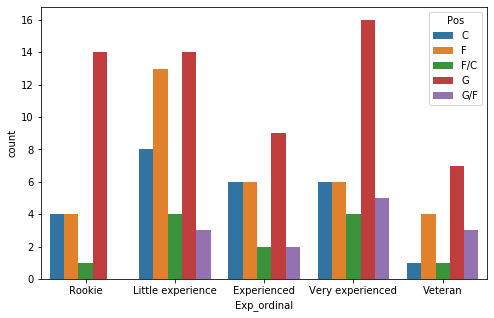

In [17]:
fig, ax = plt.subplots(figsize = (8,5))

sns.countplot(x = 'Exp_ordinal', 
              hue = "Pos", 
              data = wnba,
              order = ['Rookie','Little experience', 'Experienced',
                       'Very experienced',  "Veteran"],
             hue_order = ["C", "F",'F/C', 'G', 'G/F']) # countplot calculate the frequency on the basis
# of hue variable and plot a bar plot
plt.show()

When players get past a certain age, they become less and less physically fit as they get older. 
* Intuitively, the fitness level of a player should directly affect how much she plays in a season. 
* On average, a WNBA player played approximately `497` minutes in the **2016-2017 season**:

In [7]:
print(wnba['MIN'].mean())

496.97202797202794


Let's hypothesize
* older players generally play less than this average of 497 minutes, 
* while younger players generally play more. 

As a benchmark to distinguish between **younger** and **older players**, we'll take the **mean age of players in our sample, which is approximately 27**:

In [11]:
print(wnba['Age'].mean())

27.076923076923077


In [12]:
wnba["min_mean_relative"] = wnba['MIN'].apply(lambda x:"average or above" if x >= 497 else "below average")

In [13]:
wnba[["MIN","min_mean_relative" ]].head()

,MIN,min_mean_relative
0,173,below average
1,947,average or above
2,617,average or above
3,721,average or above
4,137,below average


In [14]:
wnba["age_mean_relative"] = wnba['Age'].apply(lambda x: "old" if x >= 27 else "young")

In [15]:
wnba[['Age',"age_mean_relative"]].head()

,Age,age_mean_relative
0,23,young
1,35,old
2,26,young
3,28,old
4,23,young


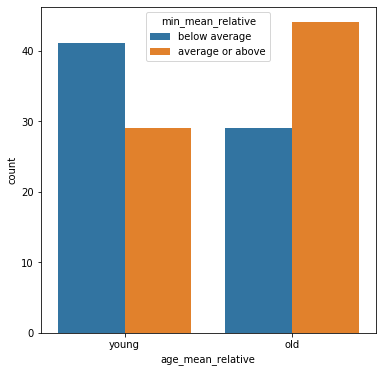

In [16]:
# Generate a grouped bar plot to confirm or reject our hypothesis

fig, ax = plt.subplots(figsize = (6,6))
sns.countplot(x = "age_mean_relative", hue = "min_mean_relative", data = wnba)
plt.show()

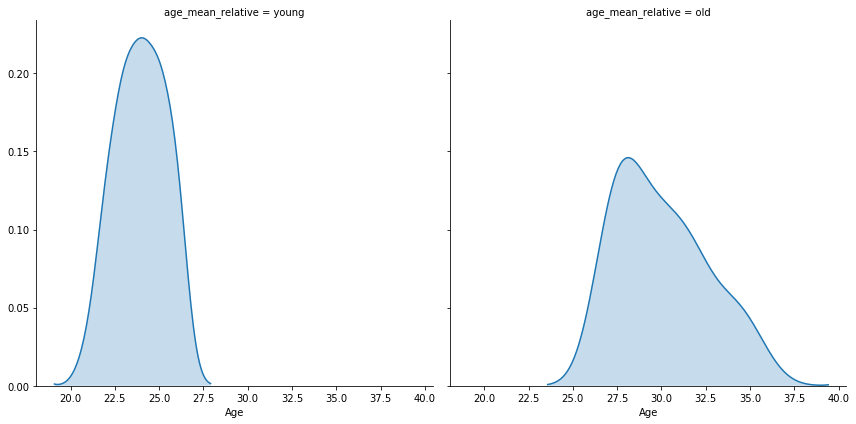

In [22]:
sns.FacetGrid(wnba, col = "age_mean_relative", height = 6).map(sns.kdeplot, "Age", shade = True)
# FacetGrid work on ratio or interval variable
plt.show()

Contrary to what our hypothesis predicted, the grouped bar plot we built showed that among old players the **"average or above"** category is the **most numerous**

A shortcoming of our analysis so far is that the `min_mean_relative` variable doesn't show much granularity. 

We can see that more old players belong to the **"average or above"** category than to **"below average"**, but we can't tell, for instance, whether old players generally play much more than the average. For all we know, they could have all **played exactly 497 minutes (which is the average)**.

The `min_mean_relative` variable is **ordinal**, and it was derived from the `MIN` variable, which is measured on a **ratio scale**. 

The information provided by the `MIN` variable is much more granular, and **we can plot the distribution of this variable** instead. Because the `MIN` variable is measured on a **ratio scale**, we'll need to use **histograms instead of bar plots**.

The easiest way to compare two histograms is to superimpose one on top of the other.

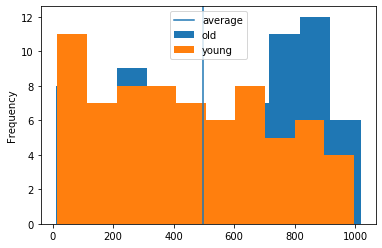

In [23]:
fig, ax = plt.subplots(figsize = (6,4))

wnba[wnba.Age>=27]["MIN"].plot.hist(label = "old")
wnba[wnba["Age"]<27]["MIN"].plot.hist(label = "young")

plt.axvline(497, label = "average")
plt.legend(loc = "upper center")
plt.show()

We can now see that most of the **old players** that belong to the **"average or above" category play significantly more than average**. 
* The main downside of the visualization above is that the **histogram for young players covers a large part of the other histogram**. 
* We can fix this easily by **plotting only the shape of the histograms**.

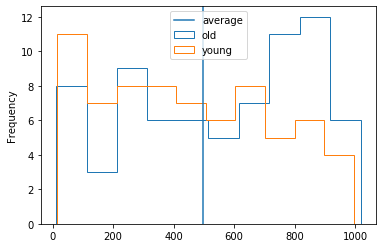

In [24]:
fig, ax = plt.subplots(figsize = (6,4))

wnba[wnba.Age>=27]["MIN"].plot.hist(label = "old", histtype = "step")
wnba[wnba["Age"]<27]["MIN"].plot.hist(label = "young",histtype = "step")

plt.axvline(497, label = "average")
plt.legend(loc = "upper center")
plt.show()

The **step-type histograms** we built made it possible to see clearly both distributions. The graph looked a bit overcrowded though, and the legend was not ideally positioned.

If we added more histograms to the graph above, it would become highly unreadable, and it'd be difficult to see any clear patterns. 
* One solution to this problem is to smooth out the shape of the histograms to make them look less dense on the graph. 
* We can **smooth out our two histograms** above for **old** and **young players** using the `Series.plot.kde()` function:

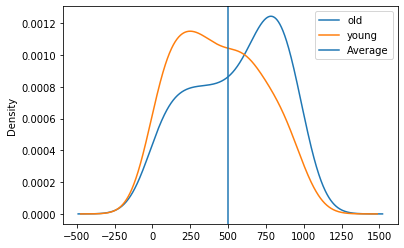

In [25]:
wnba[wnba.Age>=27]["MIN"].plot.kde(label = "old")
wnba[wnba["Age"]<27]["MIN"].plot.kde(label = "young")

plt.axvline(497, label = "Average")
plt.legend()
plt.show()

We can still observe that most of the old players that belong to the "average or above

Each of the smoothed histograms above is called a **kernel density estimate plot or, shorter, kernel density plot**. 
* Unlike **histograms**, **kernel density plots display densities on the y-axis instead of frequencies**. The **density values** are actually **probability values**. 

Now we can say that **kernel density plots** provide more clear picture about the shape of a distribution

As data scientists, we'll often need to compare more than two distributions. In fact, we compared five distributions on a **grouped bar plot**:

* **Grouped bar plots** are ideal for variables measured on **nominal** and **ordinal scales**. 
* For variables measured on a **ratio** or **interval scale**, we learned that **kernel density plots** are a **good solution when we have many distributions to compare**. However, **kernel density plots tend to become unreadable** as we reach **five distributions or more**.


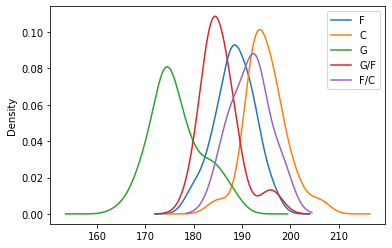

In [26]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)
plt.show()

If we look very closely, we can see a couple of clear patterns: 
* the **shortest** players are generally **guards**, 
* the **tallest players** are generally **centers**, 
* **mid-height** players are generally **forwards** or **play in a combined position**, etc.

Having to look very closely to a graph to identify obvious patterns is far from ideal. To overcome this problem, we can use other kinds of graphs, which present the same information in a more readable way.

# Strip Plot

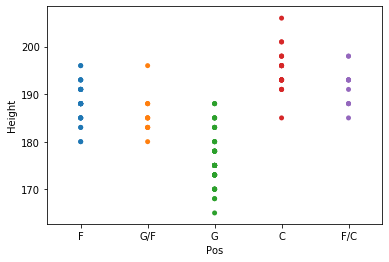

In [27]:
sns.stripplot(x = "Pos", y = "Height", data = wnba, jitter = False)
plt.show()

This is one alternative we can use to visualize the **distribution of heights** as a function of **player position**.

* We are end up with five narrow vertical strips, one above each unique value on the x-axis. Because of this, each of the five plots is called a **strip plot**.
* The **Pos variable** is represented **on the x-axis**, while **Height is on the y-axis**. 

* Each of the five vertical lines made of distinctly colored bullets represents a distribution. These are the logical steps we'd take to build a plot like the one above:

    1. Segment the data set by player position.
    2. For every segment:
     * List all the values in the **Height variable**.
     * For every value in that list, draw a bullet point on a graph. 
     * The **x-coordinate** of the bullet point is given by the **player position**, and the **y-coordinate by the player's height**.

1. We can see on the graph that the shortest players are **guards** — in fact, all players **under 180 cm are guards**. 
2. The **tallest players** are **centers** — this is the only category with **players above 2 meters**. 
3. Among **combined positions**, we can see that **F/C has slightly taller representatives** — most likely because it requires center qualities (and we've seen that the tallest players are generally centers).

A big **downside of strip plots** is that the **bullet points overlap**.
* We can fix this by adding a bit of **jitter** to each distribution.
* We can do this by setting the **jitter** parameter to **True**:

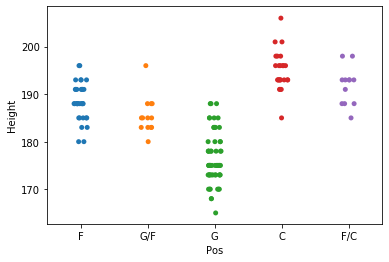

In [28]:
sns.stripplot(x = "Pos", y = "Height", data = wnba, jitter = True)
plt.show()

# Box-and-whisker plot(box plot).

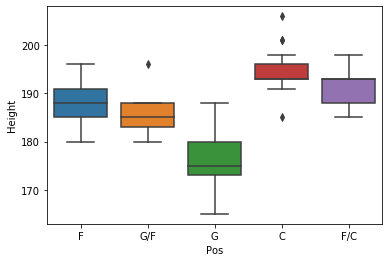

In [29]:
sns.boxplot(x = "Pos", y = "Height", data = wnba)
plt.show()

The two lines extending upwards and downwards out of the box in the middle look a bit like two whiskers, reason for which we call this plot a **box-and-whisker plot**, or, more convenient, just **box plot**.

In a nutshell, the graph on the right shows the range of the distribution and its three quartiles (**the 25th**, **the 50th** and **the 75th percentile**). 

This allows us to get a good visual intuition about the proportion of values that fall under a certain quartile, 
* Between any two quartiles, or
* between a quartile and the minimum or the maximum value in the distribution

The few dots we see for the **box plots of centers** and **guards/forwards (G/F)** represent **values** in the distribution that are **much larger** or **much lower** than the rest of the values. 
* A value that is **much lower** or **much larger** than the rest of the values in a distribution is called an **outlier**.

A value is an outlier if:

* It's **larger than the upper quartile by 1.5 times** the **difference between the upper quartile and the lower quartile (the difference is also called the interquartile range)**.
* It's **lower than the lower quartile by 1.5 times** the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).

In [26]:
wnba[wnba['Pos'] == 'C']['Height'].describe()

count     25.000000
mean     194.920000
std        4.132392
min      185.000000
25%      193.000000
50%      193.000000
75%      196.000000
max      206.000000
Name: Height, dtype: float64

In [27]:
interquartile_range = 196-193
interquartile_range

3

Every value that is `4.5` (3x1.5) bigger than the **upper quartile** is considered an **outlier**. 
* 4.5, and the upper quartile is 196. This means that any value greater than 196+4.5 = `200.5` is considered an outlier.

Every value that is `4.5`(3x1.5) lesser than the **lower quartile** is considered an **outlier**.
* 4.5, and the lower quartile is 193. This means that any value lesser than 193-4.5 = `188.5` is considered an **outlier**.

Maximum and minimum value in boxplot is the distribution that is not an outlier

This **formal definition of an outlier is arbitrary**, and it could be changed if we wanted to. 
* For any given distribution, the **upper and lower quartiles, and the interquartile** range remain **constant**. 
* However, the 1.5 factor can vary. 
* If the factor is increased, then the range outside which values are considered outliers increases as well. 
* If the factor is decreased, the range outside which values are considered outlier decreases as well.

When we generate boxplots, we can increase or decrease this factor by using the` whis` parameter of the `sns.boxplot()` function.

In [32]:
# Quartiles of the Games Played variable

quartile = wnba['Games Played'].describe().iloc[4:-1]
quartile

25%    22.0
50%    27.0
75%    29.0
Name: Games Played, dtype: float64

In [33]:
# interquartile range

iqr = quartile[2] - quartile[0]
iqr

7.0

In [34]:
lower_bound = float(quartile[0]-(iqr*1.5))
upper_bound = float(quartile[2]+(iqr*1.5))
print(lower_bound, upper_bound)

11.5 39.5


In [35]:
# how many values in the distribution are outliers
outlier_low = 0
outlier_high = 0
for i in wnba['Games Played']:
    if i < lower_bound:
        outlier_low += 1
    elif i > upper_bound:
        outlier_high += 1
        
print(outlier_low)
outlier_high

12


0

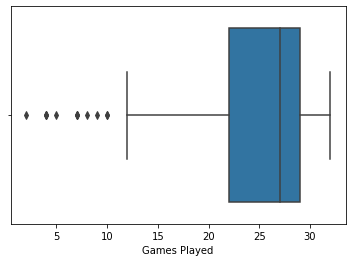

In [36]:
sns.boxplot(wnba['Games Played'])
plt.show()

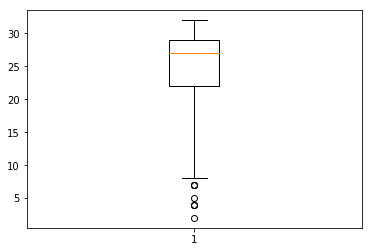

In [49]:
# reproduce above plot using matlplot, while using factor of 2 instead of default 1.5 
plt.boxplot(wnba['Games Played'], whis = 2)
plt.show()

We learned how to compare frequency distributions using graphs.
* **Grouped bar plots** are ideal to compare the frequency distributions of **nominal** or **ordinal variables**. 
* For variables measured on an **interval** or **ratio scale**, we can use **step-type histograms**, **kernel density plots**, or, for better readability, **strip plots** or **box plots**.